IMPORTACIÓN DE LIBRERÍAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from plotnine import *

PROCESAMIENTO DE DATOS

In [2]:
datosPCA = pd.read_csv('C:/Users/JCfor/Desktop/Proyecto Tesis I/DatasetFinal.csv')
##Variable valor de traspaso
valor = datosPCA['Valor de traspaso'].str.split('-',expand = True)
valor.columns = ['MenorV', 'V_traspaso']
datosPCA = pd.concat( [ datosPCA,valor.V_traspaso ] , axis= 1)

##Variable Sueldo
datosPCA['Sueldo'] = datosPCA['Sueldo'].str.extract('(\d+)', expand=False).astype(float)
datosPCA['Sueldo'] = datosPCA['Sueldo']*1000
datosPCA.head()

datosPCA = datosPCA.drop( ['Inf', 'Source.Name', 'Rec', 'Nombre', 'Club', 'División', 'Posición', 'Edad', 'Sueldo', 'V_traspaso','Valor de traspaso' ], axis=1)

In [3]:
x_PCA = np.asanyarray(datosPCA.drop(columns=['Valoracion']))
y_PCA=datosPCA['Valoracion']

print(x_PCA.shape)
print(y_PCA.shape)

(3191, 47)
(3191,)


SEPARACIÓN DEL DATSET Y ESCALAMIENTO DE DATOS

In [4]:
x_trainPCA, x_testPCA, y_trainPCA, y_testPCA = train_test_split(x_PCA,y_PCA,test_size=0.2, random_state=3)
x_trainPCA, x_valPCA, y_trainPCA, y_valPCA = train_test_split(x_trainPCA, y_trainPCA, test_size=0.25, random_state=3)

In [5]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
scaler = StandardScaler()
x_trainPCA = scaler.fit_transform(x_trainPCA)
x_testPCA = scaler.fit_transform(x_testPCA)

APLICANDO PCA

In [6]:
pca = PCA(n_components=2)

In [7]:
pca.fit(x_trainPCA)
pca.fit(x_testPCA)

PCA(n_components=2)

In [8]:
x_trainPCA = pca.transform(x_trainPCA)
x_testPCA = pca.transform(x_testPCA)

In [9]:
print(x_trainPCA.shape)
print(x_testPCA.shape)

(1914, 2)
(639, 2)


CONSTRUCCIÓN DEL MODELO

In [10]:
modeloPCA = keras.Sequential([
    keras.layers.Dense(6, activation='sigmoid', input_shape=(2,)),
    keras.layers.Dense(1)
])

sgd = tf.keras.optimizers.SGD(learning_rate=0.001,
momentum=0.1)

modeloPCA.compile(optimizer = sgd,
               loss='mse',
               metrics=['mae'])

In [11]:
historyPCA = modeloPCA.fit(x_trainPCA, y_trainPCA, epochs= 600, batch_size= 10, validation_data= (x_testPCA, y_testPCA))

Epoch 1/600
192/192 [==============================] - 1s 2ms/step - loss: 763.1569 - mae: 21.6400 - val_loss: 195.7256 - val_mae: 10.7365
Epoch 2/600
192/192 [==============================] - 0s 1ms/step - loss: 133.3438 - mae: 8.6405 - val_loss: 75.8951 - val_mae: 6.6818
Epoch 3/600
192/192 [==============================] - 0s 1ms/step - loss: 70.3831 - mae: 6.2367 - val_loss: 45.7886 - val_mae: 5.1984
Epoch 4/600
192/192 [==============================] - 0s 1ms/step - loss: 48.6457 - mae: 5.2739 - val_loss: 35.9783 - val_mae: 4.6636
Epoch 5/600
192/192 [==============================] - 0s 2ms/step - loss: 38.5449 - mae: 4.7643 - val_loss: 34.3231 - val_mae: 4.5668
Epoch 6/600
192/192 [==============================] - 0s 1ms/step - loss: 35.0317 - mae: 4.5711 - val_loss: 31.6755 - val_mae: 4.3737
Epoch 7/600
192/192 [==============================] - 0s 1ms/step - loss: 33.1600 - mae: 4.4567 - val_loss: 30.5768 - val_mae: 4.2893
Epoch 8/600
192/192 [=============================

VISUALIZACIÓN DE MÉTRICAS

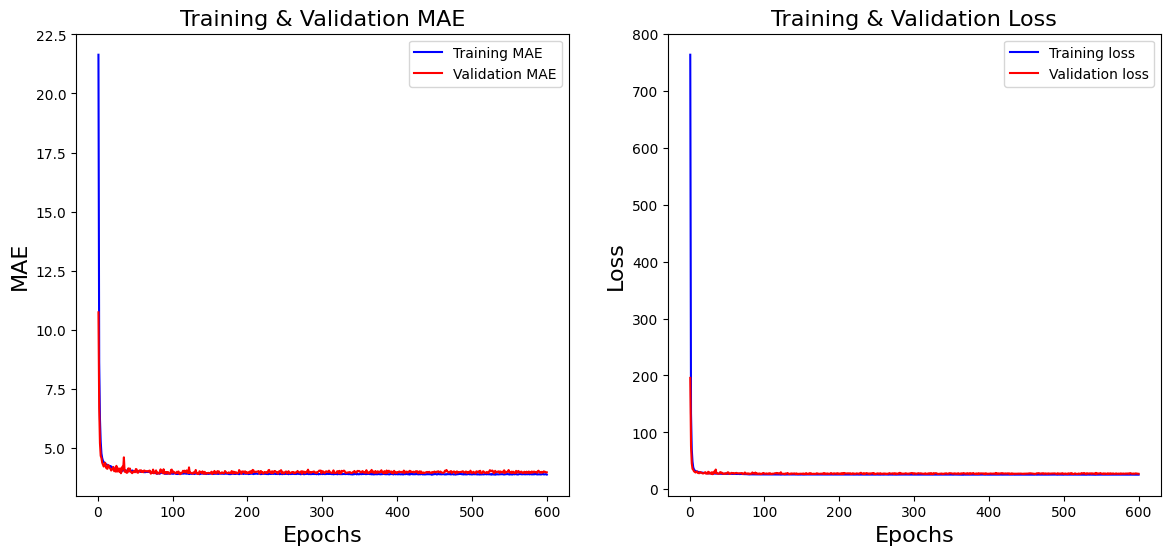

In [12]:
import matplotlib.pyplot as plt
 
#history_dict = history.history
history_dict = historyPCA.history
loss_values = history_dict['loss']
val_loss_values= history_dict['val_loss']
accuracy = history_dict['mae']
val_accuracy = history_dict['val_mae']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy (MAE) vs Epochs
#
ax[0].plot(epochs, accuracy, 'b', label='Training MAE')
ax[0].plot(epochs, val_accuracy, 'r', label='Validation MAE')
ax[0].set_title('Training & Validation MAE', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('MAE', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'b', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'r', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

R CUADRADO AJUSTADO

In [13]:
from sklearn.metrics import r2_score
y_train_pred = modeloPCA.predict(x_trainPCA)
y_test_pred = modeloPCA.predict(x_testPCA)

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_trainPCA, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_testPCA, y_test_pred)))

20/20 [==============================] - 0s 742us/step
The R2 score on the Train set is:	0.928
The R2 score on the Test set is:	0.924


In [14]:
#x_testPCA = pca.transform(x_testPCA)
DFprincipal = pd.DataFrame(data = x_testPCA, columns=['PC1','PC2'])
DFprincipal.head()

,PC1,PC2
0,-4.653755,1.042914
1,1.641887,-1.727745
2,3.317590,-2.221388
3,3.244928,-2.664933
4,-5.383573,2.106696


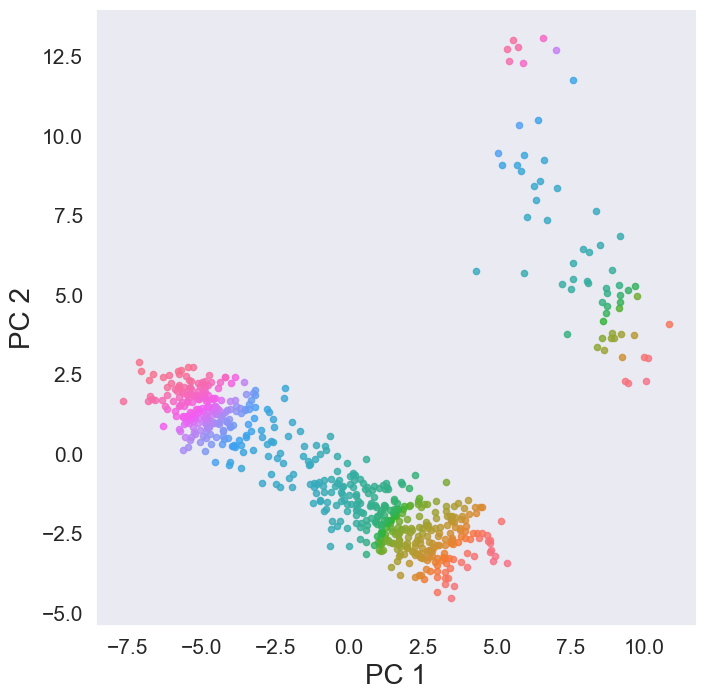

In [15]:
from turtle import width


DFprincipal['valor'] = y_test_pred
#(ggplot(DFprincipal, aes(x='PC1', y='PC2', color='y_test_pred'))+geom_point())

sns.set(style="dark")

ax = sns.lmplot(x="PC1", y="PC2", hue='valor', data = DFprincipal, legend=False,
                   fit_reg=False, scatter_kws={"s": 20}, height=7)

#texts = []
#for x, y, s in zip(principalDF.PC1, principalDF.PC2, principalDF.Nombre):
#    texts.append(plt.text(x, y, s))

#ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()

In [17]:
DFprincipal.tail() #GRAFICO DE 1-100 EN X Y 

,PC1,PC2,valor
634,-4.516254,1.276017,64.687378
635,-3.180980,1.492615,61.287975
636,-4.913586,1.140848,64.981636
637,2.628988,-3.033008,23.825596
638,2.216391,-3.860729,23.323193
